# KISHAN GUPTA

# Supervised Machine Learning Task
Dataset Link: https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python

Perform Data analysis and use different machine learning 
algorithms.

Compare at least 3 different Algorithms and show their accuracies 
with the help of graph.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Loading the Dataset

In [2]:
df= pd.read_csv(r'C:\Users\Kishan\Desktop\archive (1)\diabetes_data.csv',index_col=0)
df.head(20)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [3]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 8


In [4]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete Features Count {}".format(len(discrete_feature)))

Discrete Features Count 1


In [5]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous Features Count {}".format(len(continuous_feature)))

Continuous Features Count 7


In [6]:
categorical_feature=[feature for feature in df.columns if feature not in numerical_feature]
print("Categorical Features Count {}".format(len(categorical_feature)))

Categorical Features Count 0


In [7]:
df.drop_duplicates(inplace=True)
df.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.dropna(how='all',axis='columns',inplace=True)

# Check Missing Values:

In [9]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Handle Missing Values
df.isnull().sum()*100/len(df)

Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# Shape of Dataset

In [11]:
df.shape

(768, 8)

In [12]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


# HeatMap

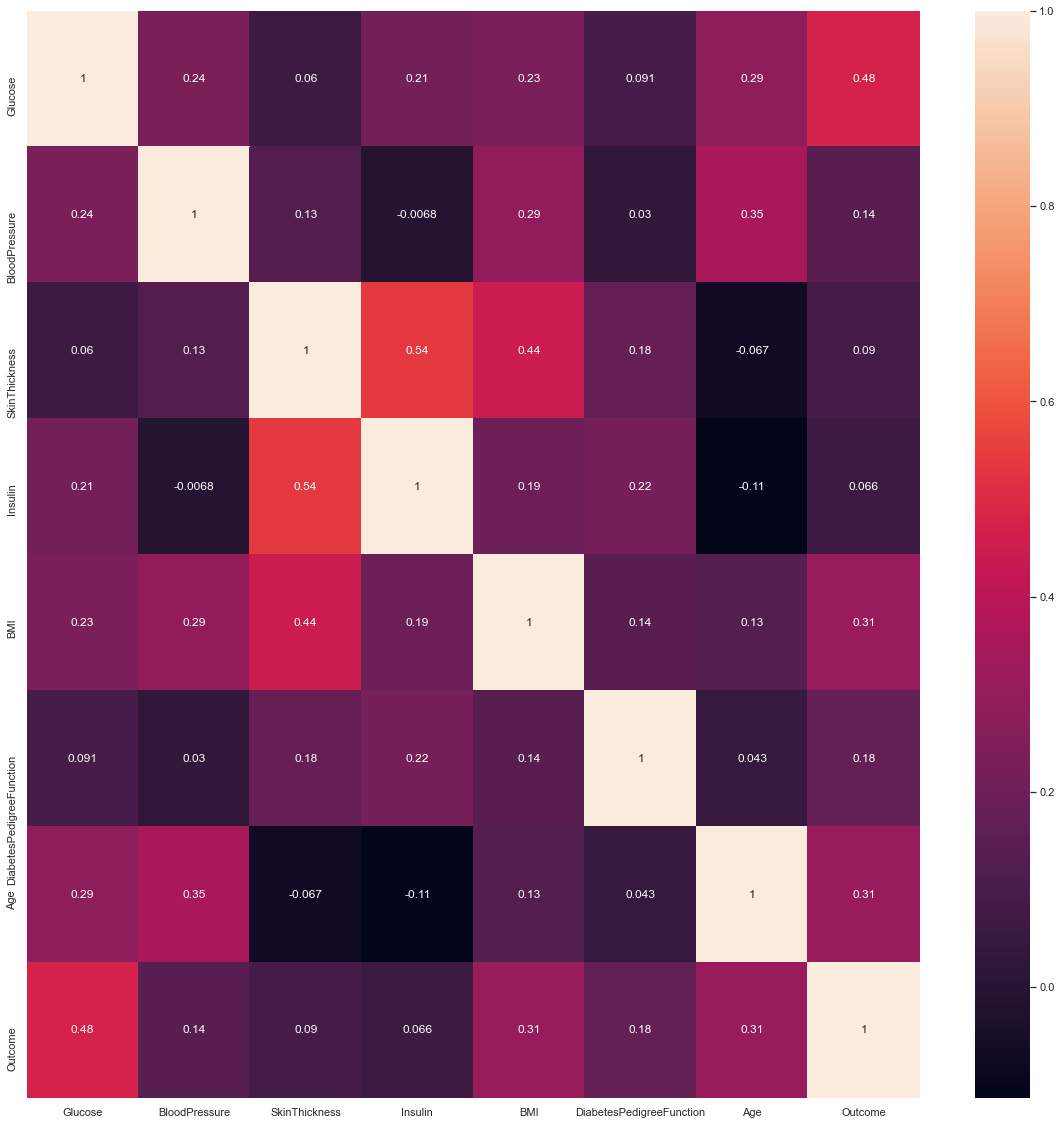

In [14]:
kul=df.corr(method ='spearman')
plt.figure(figsize=(20,20))   #ploting map
g=sns.heatmap(kul, annot=True)

# Distplot

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


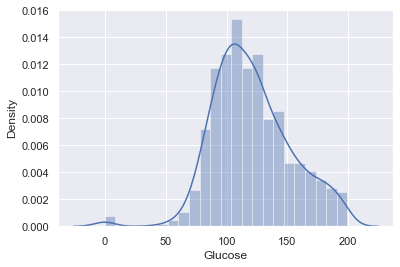

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


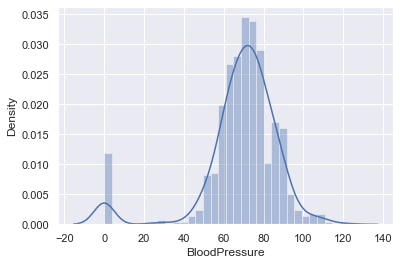

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


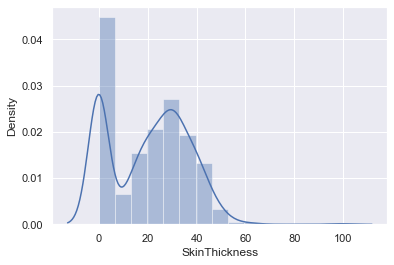

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


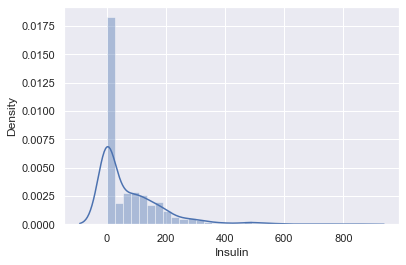

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


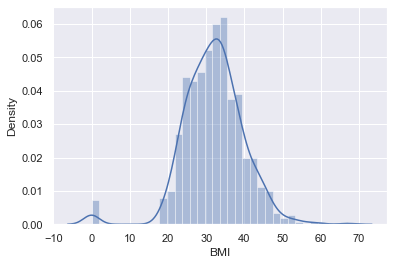

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


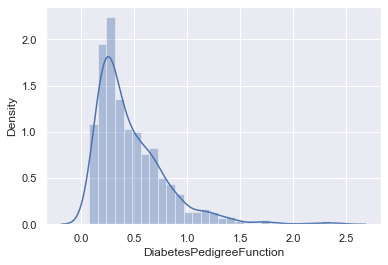

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


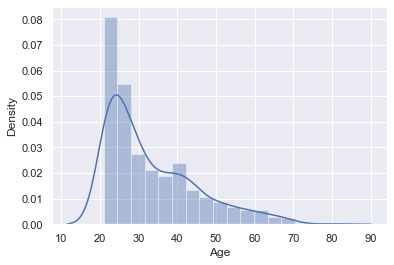

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


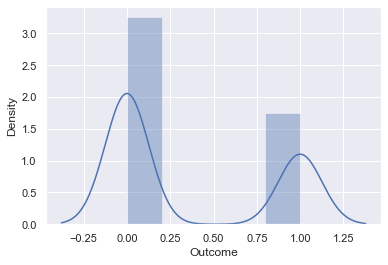

In [15]:
df_feature=df.columns

for feature in df_feature:
    p=sns.distplot(a=df[feature])
    plt.show()

# Histogram Plot

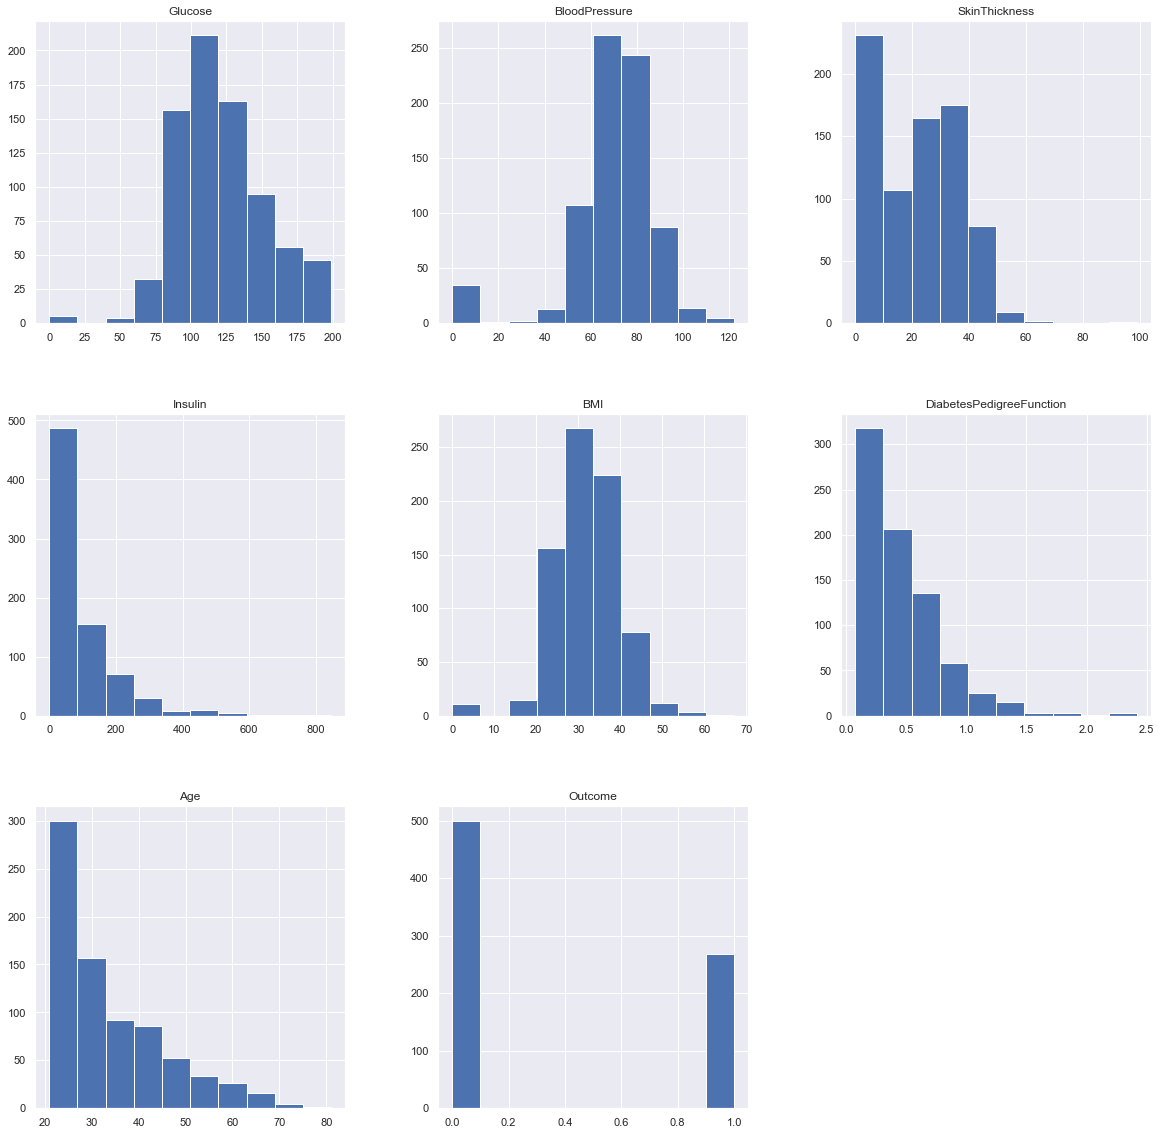

In [16]:
k=df.hist(figsize=(20,20))

# Scatter Plot

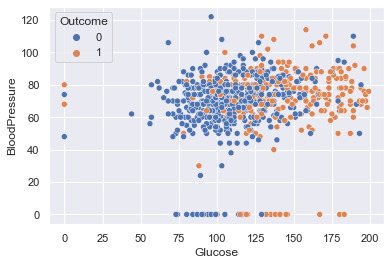

In [17]:
km= sns.scatterplot(x ='Glucose', y='BloodPressure',hue='Outcome',data=df)

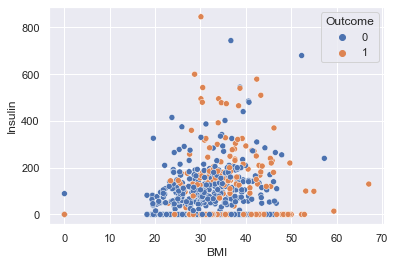

In [18]:
km1= sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=df)

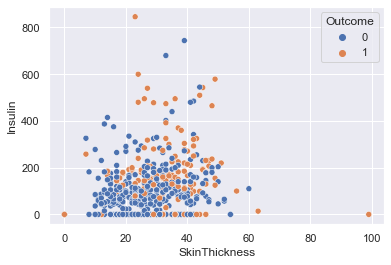

In [19]:
km2= sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df)

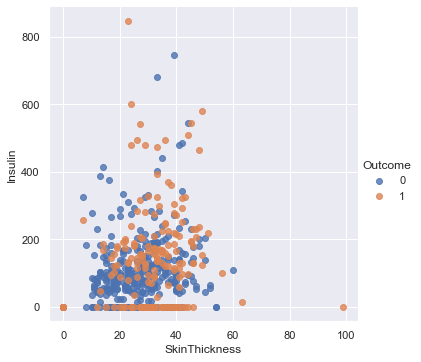

In [20]:
sns.lmplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df,fit_reg=False)

# Box Plot

<AxesSubplot:>

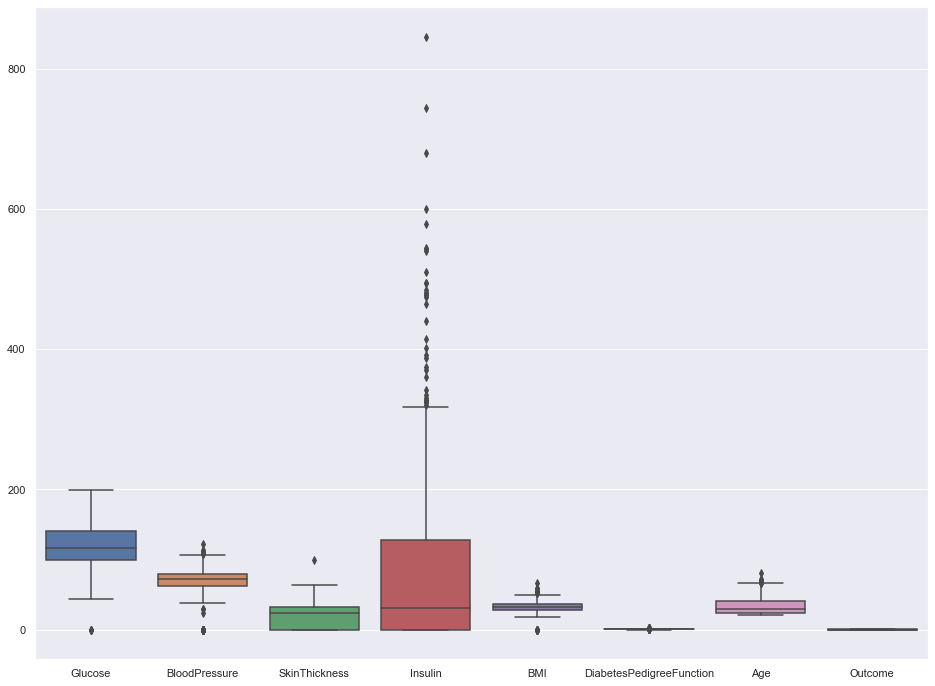

In [21]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df)

<AxesSubplot:ylabel='SkinThickness'>

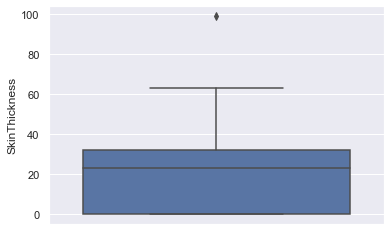

In [22]:
sns.boxplot(y='SkinThickness',data=df)

# Pie Chart

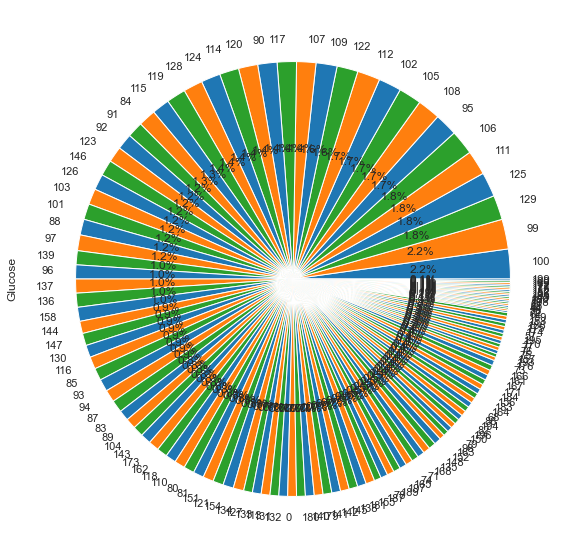

In [23]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]    
ks=df['Glucose'].value_counts(ascending=False).plot.pie(colors=colors,autopct='%1.1f%%',figsize=(15,10))
plt.show()

# Pair Plot

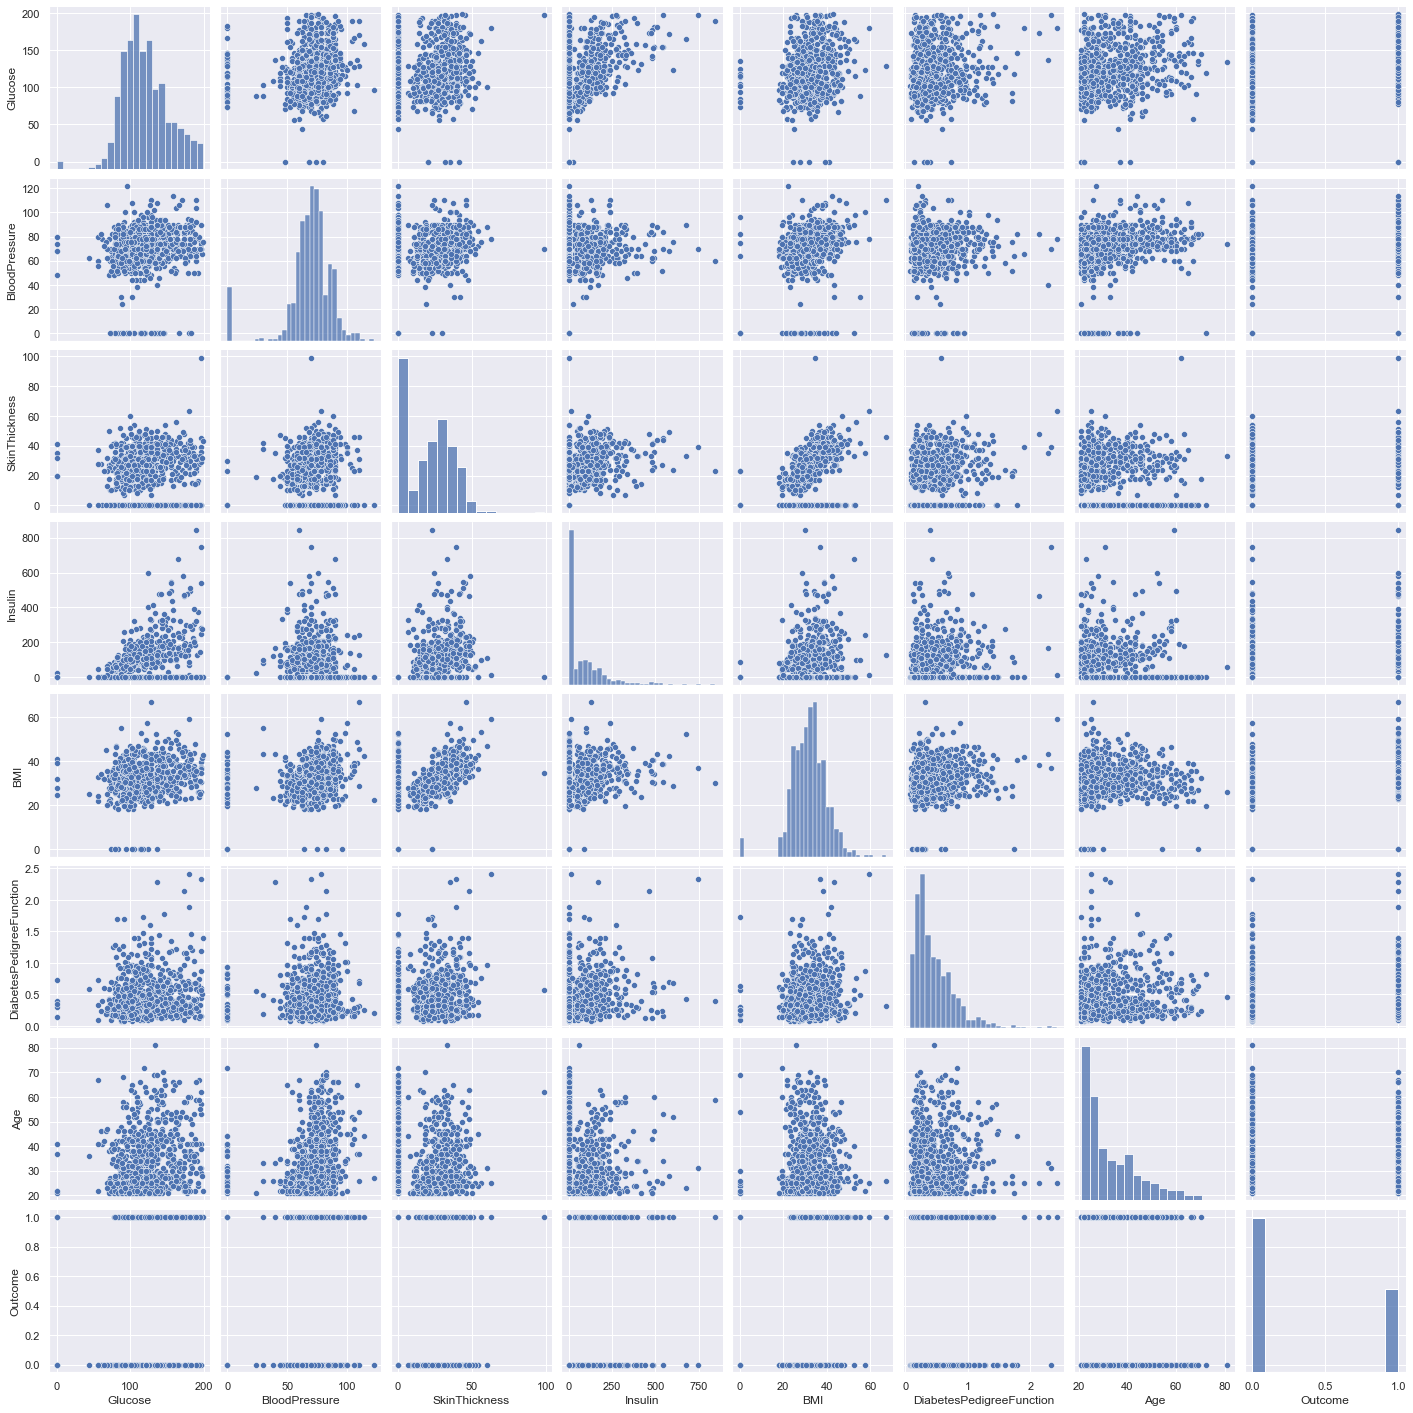

In [24]:
sns.pairplot(df)

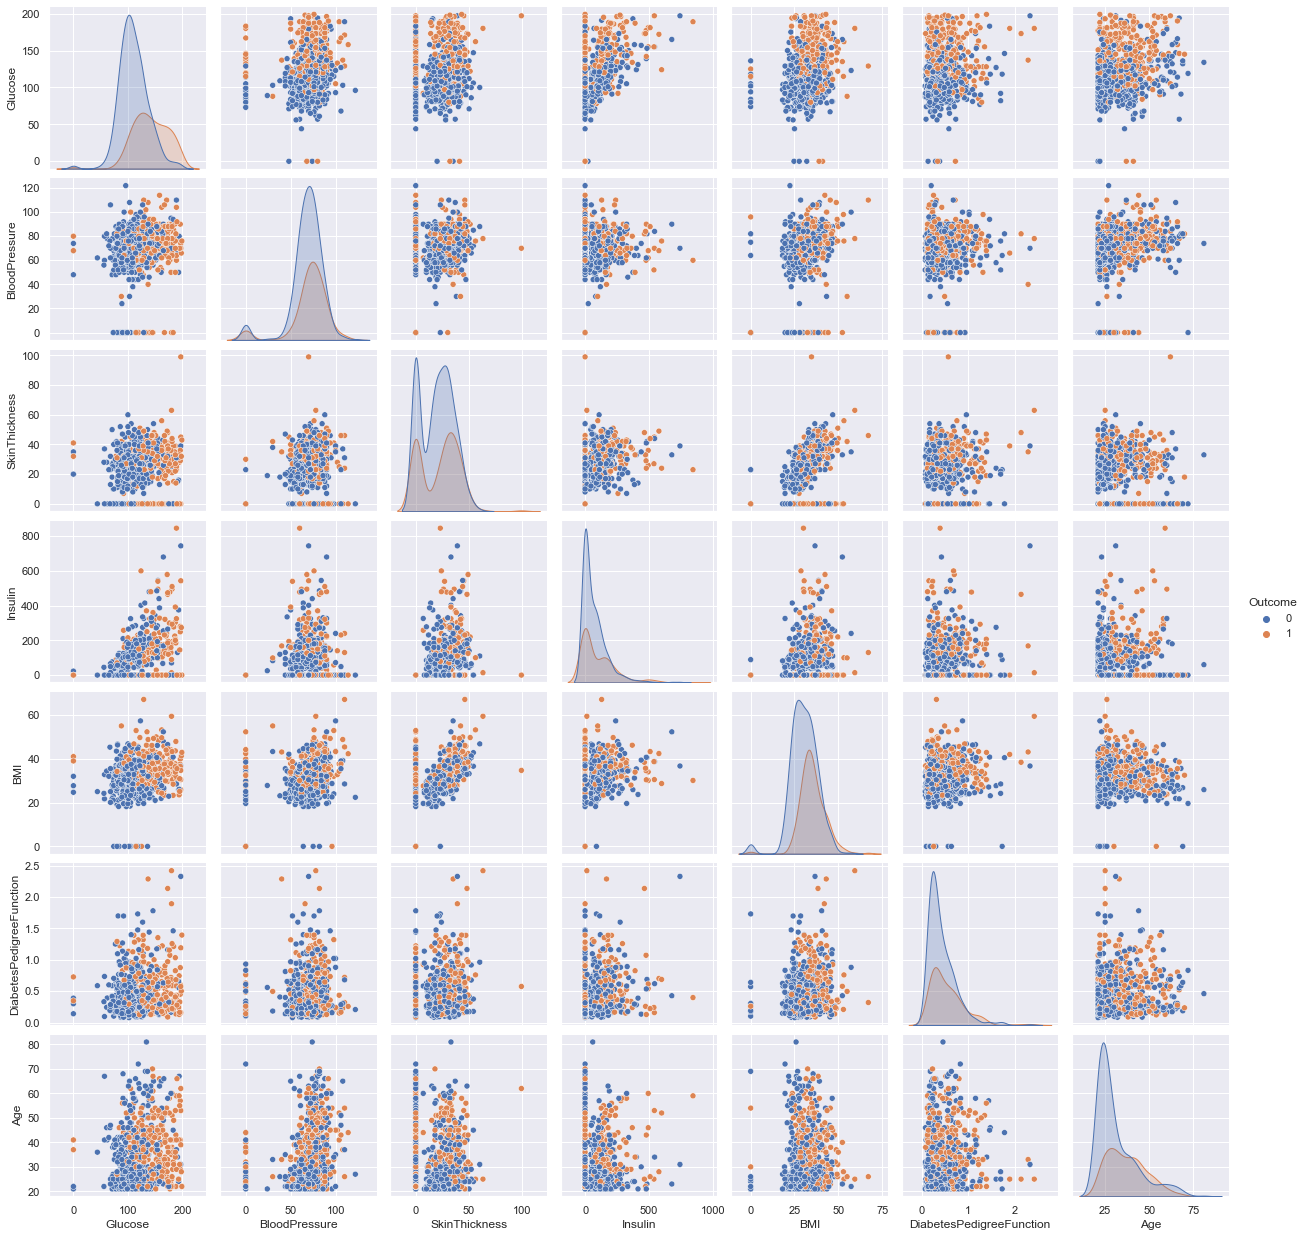

In [25]:
sns.pairplot(data=df,hue='Outcome')
plt.show()

# Join Plot

<Figure size 1152x864 with 0 Axes>

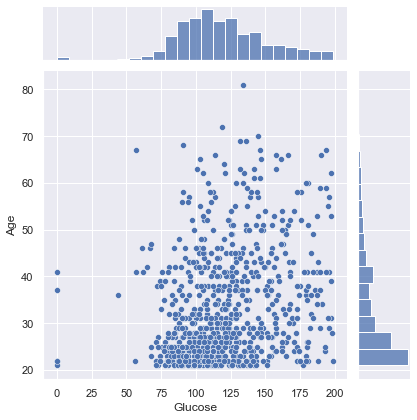

In [26]:
plt.figure(figsize=(16,12))
sns.jointplot(x='Glucose',y='Age',data=df)

# Density Plot

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='Age'>

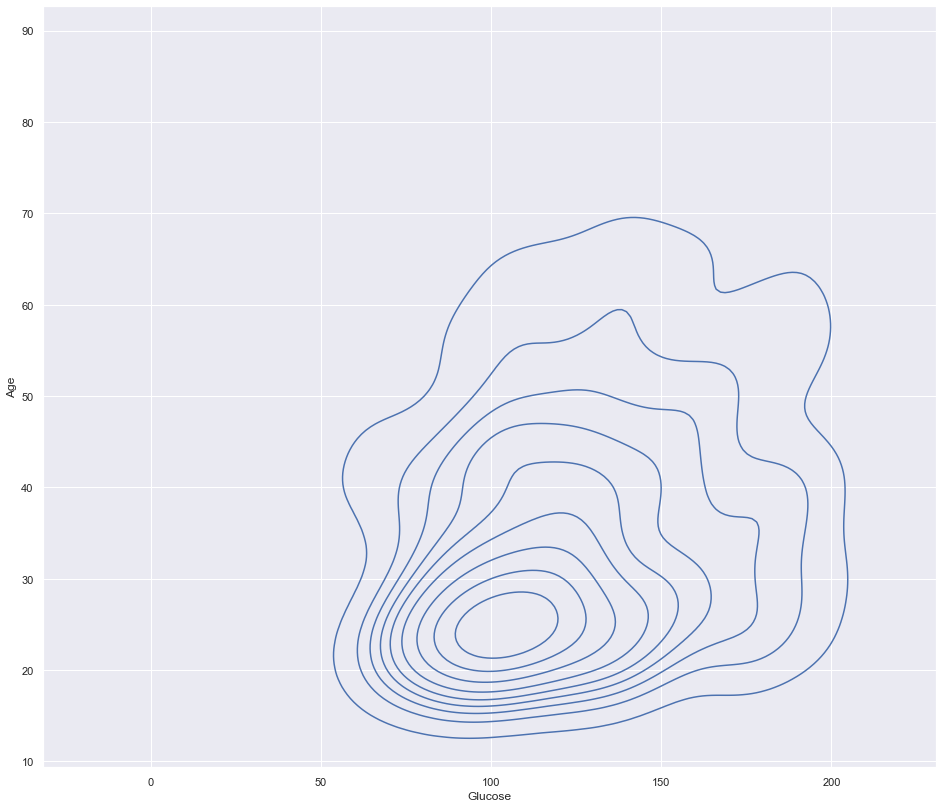

In [27]:
plt.figure(figsize=(16,14))
sns.kdeplot(df.Glucose, df.Age)

# Probability plot

Each data point in y using marker symbols and draws a reference line that represents the theroetical distribution

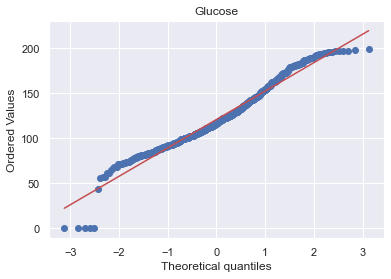

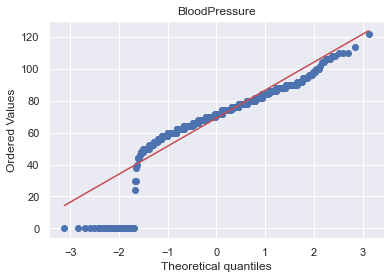

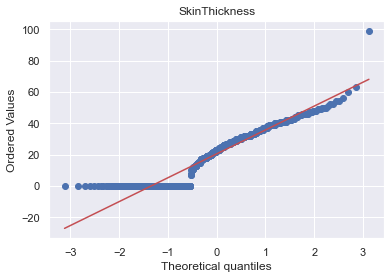

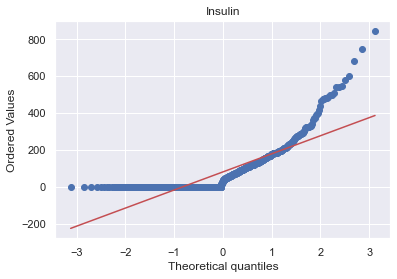

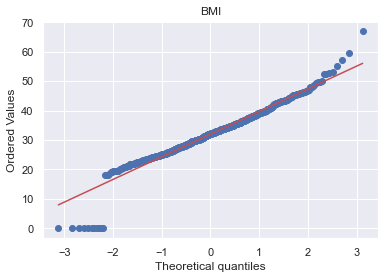

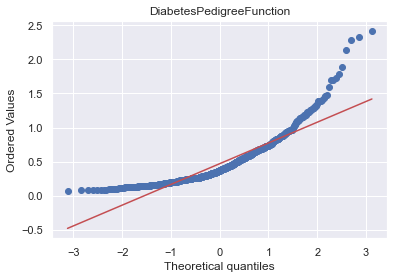

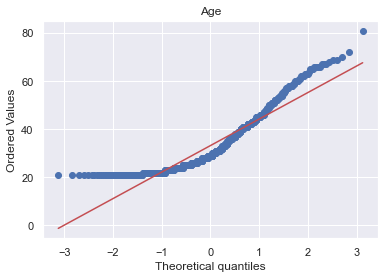

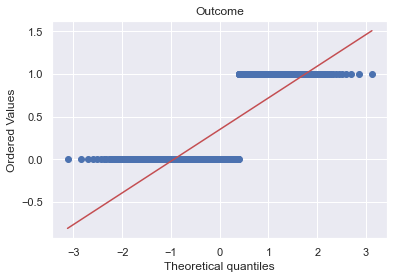

In [28]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature],plot=plt)
    plt.title(feature)
    plt.show()

# Training The Dataset

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [30]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [31]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [32]:
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

# Splitting the Dataset into Training and Testing Phase

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

# Fitting the Dataset into various models:-

# Support Vector Machine

In [34]:
def svm_classifier(x_train,x_test,y_train,y_test):

    classifier_svm=SVC(kernel='rbf', random_state=0)
    classifier_svm.fit(x_train,y_train)

    y_predict=classifier_svm.predict(x_test)

    cm=confusion_matrix(y_test,y_predict)

    return print(f"Train Score : {classifier_svm.score(x_train,y_train)}\nTest Score : {classifier_svm.score(x_test,y_test)}")

# KNN(K- Nearest Neighbours)

In [35]:
def knn_classifier(x_train,x_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric = 'minkowski',p=2)
    classifier_knn.fit(x_train,y_train)
    
    y_predict=classifier_knn.predict(x_test)
    
    cm=confusion_matrix(y_test,y_predict)
    
    return print(f"Train Score : {classifier_knn.score(x_train,y_train)}\nTest Score : {classifier_knn.score(x_test,y_test)}")

# Naives Baye's Algorithm

In [36]:
def naive_classifier(x_train,x_test,y_train,y_test):
    classifier_naive=GaussianNB()
    classifier_naive.fit(x_train,y_train)
    
    y_predict=classifier_naive.predict(x_test)
    
    cm=confusion_matrix(y_test,y_predict)
    
    return print(f"Train Score : {classifier_naive.score(x_train,y_train)}\nTest Score : {classifier_naive.score(x_test,y_test)}")

# Decision Tree Algorithm

In [37]:
def tree_classifier(x_train,x_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion = 'entropy',random_state=0,splitter='best')
    classifier_tree.fit(x_train,y_train)
    
    y_predict=classifier_tree.predict(x_test)
    
    cm=confusion_matrix(y_test,y_predict)
    
    return print(f"Train Score : {classifier_tree.score(x_train,y_train)}\nTest Score : {classifier_tree.score(x_test,y_test)}")

# Random Forest Algorithm

In [38]:
def forest_classifier(x_train,x_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion = 'entropy',random_state=0)
    classifier_forest.fit(x_train,y_train)
    
    y_predict=classifier_forest.predict(x_test)
    
    cm=confusion_matrix(y_test,y_predict)
    
    return print(f"Train Score : {classifier_forest.score(x_train,y_train)}\nTest Score : {classifier_forest.score(x_test,y_test)}")

In [39]:
def print_score(x_train, x_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(x_train,x_test,y_train,y_test)
    
    print("-"*100)
    print()
    
    print("KNN:\n")
    knn_classifier(x_train,x_test,y_train,y_test)
    
    print("-"*100)
    print()
    
    print("Naive:\n")
    naive_classifier(x_train,x_test,y_train,y_test)
    
    print("-"*100)
    print()
    
    print("Decision tree:\n")
    tree_classifier(x_train,x_test,y_train,y_test)
    
    print("-"*100)
    print()
    
    print("Random Forest:\n")
    forest_classifier(x_train,x_test,y_train,y_test)

In [40]:
print_score(x_train,x_test,y_train,y_test)

SVM:

Train Score : 0.760586319218241
Test Score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train Score : 0.7899022801302932
Test Score : 0.7402597402597403
----------------------------------------------------------------------------------------------------

Naive:

Train Score : 0.760586319218241
Test Score : 0.7727272727272727
----------------------------------------------------------------------------------------------------

Decision tree:

Train Score : 1.0
Test Score : 0.7337662337662337
----------------------------------------------------------------------------------------------------

Random Forest:

Train Score : 1.0
Test Score : 0.7857142857142857


In [41]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=20.0)
knn= KNeighborsClassifier(n_neighbors=3)
svm=SVC(kernel='linear')
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)

In [42]:
log.fit(x_train,y_train)
knn.fit(x_train,y_train)
svm.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [43]:
y_log=log.predict(x_test)
y_knn=knn.predict(x_test)
y_svm=svm.predict(x_test)
y_dt=dt.predict(x_test)
y_rf=rf.predict(x_test)

In [44]:
log_cm_test=confusion_matrix(y_test,y_log)
knn_cm_test=confusion_matrix(y_test,y_knn)
svm_cm_test=confusion_matrix(y_test,y_svm)
dt_cm_test=confusion_matrix(y_test,y_dt)
rf_cm_test=confusion_matrix(y_test,y_rf)

# Compare the graph on the basis of heatmap

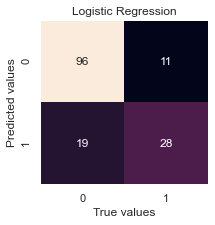

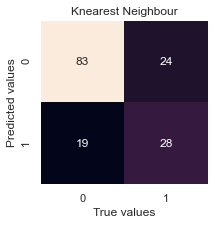

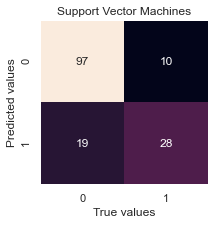

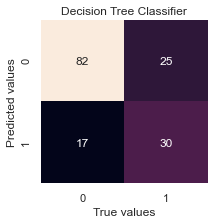

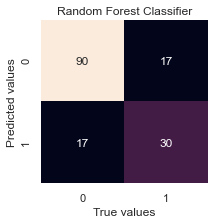

In [45]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(log_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('Logistic Regression')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(knn_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('Knearest Neighbour')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(svm_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('Support Vector Machines')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(dt_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('Decision Tree Classifier')
plt.show()

plt.figure(figsize=(3,3))
sns.heatmap(rf_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('Random Forest Classifier')
plt.show()

# Compare the Accuracy score on the basis of Barplot

In [46]:
from sklearn.metrics import accuracy_score
log_acc_test=accuracy_score(y_test,y_log)
knn_acc_test=accuracy_score(y_test,y_knn)
svm_acc_test=accuracy_score(y_test,y_svm)
dt_acc_test=accuracy_score(y_test,y_dt)
rf_acc_test=accuracy_score(y_test,y_rf)

In [47]:
print("Accuracy Scores:\n")

print('-------Logistic Regression-------\n')
print(log_acc_test,'\n')

print('-------K- Nearest Neighbour-------\n')
print(knn_acc_test,'\n')

print('-------SVM-------\n')
print(svm_acc_test,'\n')

print('-------Decision Tree Classifier-------\n')
print(dt_acc_test,'\n')

print('-------Random Forest Classifier-------\n')
print(rf_acc_test,'\n')

Accuracy Scores:

-------Logistic Regression-------

0.8051948051948052 

-------K- Nearest Neighbour-------

0.7207792207792207 

-------SVM-------

0.8116883116883117 

-------Decision Tree Classifier-------

0.7272727272727273 

-------Random Forest Classifier-------

0.7792207792207793 



<ipython-input-48-cf6b18bb3c6f>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(y_pos,performance,width,align='center',alpha=1,color='rbgy')


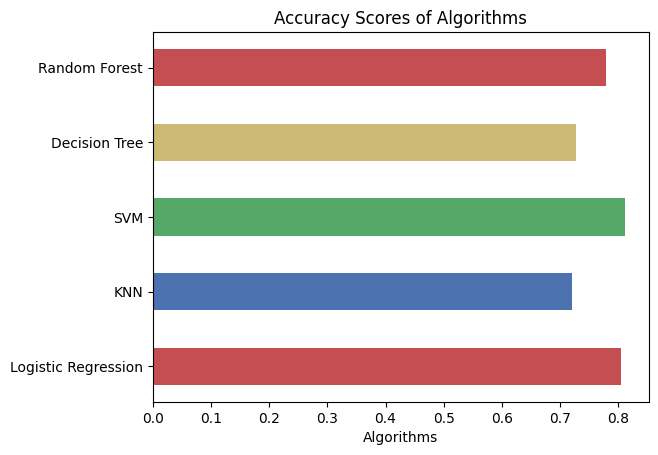

In [48]:
acc_list=[log_acc_test,knn_acc_test,svm_acc_test,dt_acc_test,rf_acc_test]

import matplotlib.pyplot as plt; plt.rcdefaults()

objects=('Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest')
y_pos=np.arange(len(objects))
performance= acc_list
width=1/2
plt.barh(y_pos,performance,width,align='center',alpha=1,color='rbgy')
plt.yticks(y_pos,objects)
plt.xlabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Algorithms')
plt.show()

# Performance

In [49]:
classifier_forest= RandomForestClassifier(criterion='entropy')
classifier_forest.fit(x_train,y_train)
y_predict=classifier_forest.predict(x_test)

cm=confusion_matrix(y_test,y_predict)
cm

array([[92, 15],
       [16, 31]], dtype=int64)

In [51]:
pd.crosstab(y_test,y_predict,rownames=['True'],colnames=['Predicted'],margins= True)

Predicted,0,1,All
True,,,
0,92,15,107
1,16,31,47
All,108,46,154


# Check the data balanced or not

In [54]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Find the Accuracy ,precision, recall and F1-score

In [55]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [56]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



In [57]:
y_predict_prob=classifier_forest.predict_proba(x_test)[:,1]
y_predict_prob

array([0.87, 0.18, 0.05, 0.62, 0.03, 0.08, 0.83, 0.91, 0.36, 0.47, 0.71,
       0.93, 0.06, 0.27, 0.32, 0.66, 0.79, 0.02, 0.41, 0.24, 0.67, 0.22,
       0.18, 0.22, 0.03, 0.48, 0.02, 0.83, 0.02, 0.11, 0.35, 0.21, 0.12,
       0.61, 0.06, 0.83, 0.54, 0.02, 0.5 , 0.78, 0.3 , 0.08, 0.29, 0.67,
       0.6 , 0.03, 0.05, 0.06, 0.5 , 0.3 , 0.4 , 0.27, 0.73, 0.6 , 0.3 ,
       0.  , 0.34, 0.39, 0.32, 0.12, 0.81, 0.69, 0.01, 0.73, 0.92, 0.41,
       0.69, 0.08, 0.74, 0.19, 0.18, 0.15, 0.1 , 0.85, 0.91, 0.47, 0.24,
       0.74, 0.24, 0.2 , 0.35, 0.48, 0.24, 0.  , 0.13, 0.15, 0.1 , 0.32,
       0.89, 0.11, 0.42, 0.35, 0.2 , 0.01, 0.77, 0.09, 0.39, 0.45, 0.43,
       0.67, 0.17, 0.  , 0.12, 0.03, 0.61, 0.51, 0.08, 0.54, 0.01, 0.52,
       0.05, 0.39, 0.44, 0.75, 0.68, 0.62, 0.1 , 0.44, 0.16, 0.66, 0.27,
       0.34, 0.12, 0.35, 0.05, 0.01, 0.28, 0.65, 0.26, 0.54, 0.53, 0.02,
       0.06, 0.7 , 0.4 , 0.49, 0.43, 0.52, 0.57, 0.35, 0.06, 0.73, 0.  ,
       0.1 , 0.69, 0.  , 0.06, 0.13, 0.19, 0.28, 0.

# Roc Score

In [58]:
roc_auc_score(y_test,y_predict_prob)

0.8401272618810897

# Improving acc. by Hyperparameter Tunning

In [60]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_forest,X=x_train,y=y_train,cv=10)
print(accuracies.mean(),accuracies.std())

0.7410100475938657 0.05051514868435177


In [61]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters={'n_estimators':[25,50,200,300],'criterion':['gini','entropy'],'max_depth':[14,20,25,30]}

In [65]:
grid_search=GridSearchCV(estimator=classifier_forest,param_grid=parameters,scoring='accuracy',n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print('Best Accuracy : ',grid_search.best_score_)
print('Best Parameters : ',grid_search.best_params_)

Best Accuracy :  0.7606024256963881
Best Parameters :  {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 300}


In [66]:
classifier_forest=RandomForestClassifier(criterion='gini',max_depth=25,n_estimators=200,random_state=0)
classifier_forest.fit(x_train,y_train)
y_predict=classifier_forest.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
cm

array([[93, 14],
       [15, 32]], dtype=int64)

# THANK YOU